In [1]:
from IPython.display import display,HTML
c1,c2,f1,f2,fs1,fs2=\
'#00ff66','#6600ff','Wallpoet','Orbitron',20,10
def dhtml(string,fontcolor=c1,font=f1,fontsize=fs1):
    display(HTML("""<style>
    @import 'https://fonts.googleapis.com/css?family="""\
    +font+"""&effect=3d-float';</style>
    <h1 class='font-effect-3d-float' 
    style='font-family:"""+font+\
    """; color:"""+fontcolor+\
    """; font-size:"""+str(fontsize)+"""px;'>
    %s</h1>"""%string))

In [2]:
dhtml('Code Modules')

In [3]:
import os,h5py,seaborn as sn
import pandas as pd,numpy as np
import tensorflow as tf,pylab as pl
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers as tkl
from tensorflow.keras import callbacks as tkc
fpath='../input/arrays-of-artificial-images/'

In [4]:
dhtml('Functions')

In [5]:
def randi(nmin,nmax): 
    return np.random.randint(nmin,nmax)
def randch(a): 
    return np.random.choice(a,1)[0]
def randcoef():
    a=(.5+.000001*randi(1,999999))\
      *randch([-1,1])
    b=randi(3,10)
    c=.001*randi(1,99)*randch([-1,1])
    return a,b,c
def randcoord(a,b,c):
    t=np.arange(0,16*b*np.pi,1/(1440*b))
    fx=np.sin(t/6)+\
       a*np.sin(b*t)*np.cos(t)-\
       c*np.sin(16*b*t)
    fy=np.cos(t/6)+\
       a*np.sin(b*t)*np.sin(t)-\
       c*np.cos(16*b*t)
    return fx,fy
def randcol():
    return [np.random.random(3)]

In [6]:
def checkplot(n):
    global images,labels,targets
    [a,c]=targets[n]; b=labels[n]
    fx,fy=randcoord(a,b,c)
    fig=pl.figure(figsize=(8,4))
    ax=fig.add_subplot(121)
    ax.scatter(fx,fy,s=.1**4,c=randcol())
    ax.set_axis_off()
    pl.tight_layout(pad=.05)
    ax=fig.add_subplot(122)
    ax.imshow(images[n])
    ax.set_axis_off()
    pl.show()

In [7]:
def cb(fw):
    early_stopping=tkc\
    .EarlyStopping(monitor='val_loss',
                   patience=20,verbose=2)
    checkpointer=tkc\
    .ModelCheckpoint(filepath=fw,verbose=2,
                     save_best_only=True)
    lr_reduction=tkc\
    .ReduceLROnPlateau(monitor='val_loss',verbose=2,
                       patience=5,factor=.8)
    return [checkpointer,early_stopping,lr_reduction]

In [8]:
def history_plot(fit_history):
    pl.figure(figsize=(10,10)); pl.subplot(211)
    keys=list(fit_history.history.keys())[0:4]
    pl.plot(fit_history.history[keys[0]],
            color=c1,label='train')
    pl.plot(fit_history.history[keys[2]],
            color=c2,label='valid')
    pl.xlabel("Epochs"); pl.ylabel("Loss")
    pl.legend(); pl.grid()
    pl.title('Loss Function')     
    pl.subplot(212)
    pl.plot(fit_history.history[keys[1]],
            color=c1,label='train')
    pl.plot(fit_history.history[keys[3]],
            color=c2,label='valid')
    pl.xlabel("Epochs"); pl.ylabel("Accuracy")    
    pl.legend(); pl.grid()
    pl.title('Accuracy'); pl.show()

In [9]:
dhtml('Data')

In [10]:
fn='ArtificialImages01.h5'
with h5py.File(fpath+fn,'r') as f:
    keys=list(f.keys()); print(keys)
    images=np.array(f[keys[0]])
    labels=np.array(f[keys[1]])
    targets=np.array(f[keys[2]])
    f.close()

['images', 'labels', 'targets']


In [11]:
print(fn)
filenames=['ArtificialImages0%d'%(i+2)+'.h5'
           for i in range(5)]
for fn in filenames:
    print(fn)
    with h5py.File(fpath+fn,'r') as f:
        keys=list(f.keys())
        addimages=np.array(f[keys[0]])
        addlabels=np.array(f[keys[1]])
        addtargets=np.array(f[keys[2]])
        f.close()
    images=np.vstack([images,addimages])
    labels=np.vstack([labels.reshape(-1,1),
                      addlabels.reshape(-1,1)])
    targets=np.vstack([targets,addtargets])
labels=labels.reshape(-1)
images.shape,labels.shape,targets.shape

ArtificialImages01.h5
ArtificialImages02.h5
ArtificialImages03.h5
ArtificialImages04.h5
ArtificialImages05.h5
ArtificialImages06.h5


((1080, 288, 288, 3), (1080,), (1080, 2))

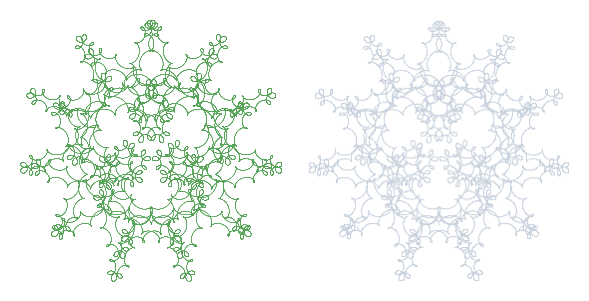

In [12]:
n=np.random.randint(labels.shape[0])
checkplot(n)

In [13]:
classes=list(set(labels))
num_classes=len(classes)
rd=dict(zip(classes,
            list(range(len(classes)))))
labels=np.array([rd.get(x,x) for x in labels],
                dtype=np.int32)
rd,classes,list(set(labels))

({3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6},
 [3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6])

In [14]:
N=labels.shape[0]; n=int(.1*N)
shuffle_ids=np.arange(N)
np.random.RandomState(12).shuffle(shuffle_ids)
images=images[shuffle_ids]
labels=labels[shuffle_ids]
targets=targets[shuffle_ids]
x_test,x_valid,x_train=\
images[:n],images[n:2*n],images[2*n:]
y_test,y_valid,y_train=\
labels[:n],labels[n:2*n],labels[2*n:]
y_test2,y_valid2,y_train2=\
targets[:n],targets[n:2*n],targets[2*n:]

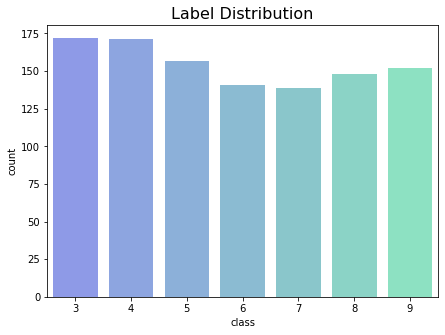

In [15]:
df=pd.DataFrame(labels,columns=['label'])
df['class']=[classes[l] for l in labels]
pl.figure(figsize=(7,5))
sn.countplot(x='class',data=df,
             palette='winter',alpha=.5)
ti='Label Distribution'
pl.title(ti,fontsize=16);

In [16]:
dhtml('Classification')

In [17]:
def cnn_model():
    model=Sequential()
    model.add(tkl.Conv2D(32,(5,5),padding='same',
                         input_shape=x_train.shape[1:]))
    model.add(tkl.Activation('relu'))
    model.add(tkl.MaxPooling2D(pool_size=(2,2)))
    model.add(tkl.Dropout(.25))
    model.add(tkl.Conv2D(96,(5,5)))
    model.add(tkl.Activation('relu'))    
    model.add(tkl.MaxPooling2D(pool_size=(2,2)))
    model.add(tkl.Dropout(.25))
    model.add(tkl.GlobalAveragePooling2D())    
    model.add(tkl.Dense(2048,activation='relu'))
    model.add(tkl.Dropout(.5))         
    model.add(tkl.Dense(num_classes))
    model.add(tkl.Activation('softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',metrics=['accuracy'])
    return model

In [18]:
cnn_model=cnn_model()
fw='weights.best.hdf5'
history=cnn_model\
.fit(x_train,y_train,epochs=200,
     batch_size=64,verbose=2,
     validation_data=(x_valid,y_valid),
     callbacks=cb(fw))

Epoch 1/200

Epoch 00001: val_loss improved from inf to 1.94772, saving model to weights.best.hdf5
14/14 - 2s - loss: 1.9557 - accuracy: 0.1597 - val_loss: 1.9477 - val_accuracy: 0.1296
Epoch 2/200

Epoch 00002: val_loss improved from 1.94772 to 1.94608, saving model to weights.best.hdf5
14/14 - 2s - loss: 1.9433 - accuracy: 0.1470 - val_loss: 1.9461 - val_accuracy: 0.1019
Epoch 3/200

Epoch 00003: val_loss improved from 1.94608 to 1.94038, saving model to weights.best.hdf5
14/14 - 2s - loss: 1.9310 - accuracy: 0.2072 - val_loss: 1.9404 - val_accuracy: 0.1296
Epoch 4/200

Epoch 00004: val_loss did not improve from 1.94038
14/14 - 2s - loss: 1.9083 - accuracy: 0.2037 - val_loss: 1.9910 - val_accuracy: 0.1296
Epoch 5/200

Epoch 00005: val_loss improved from 1.94038 to 1.92527, saving model to weights.best.hdf5
14/14 - 2s - loss: 1.9368 - accuracy: 0.1921 - val_loss: 1.9253 - val_accuracy: 0.1852
Epoch 6/200

Epoch 00006: val_loss improved from 1.92527 to 1.88352, saving model to weights.

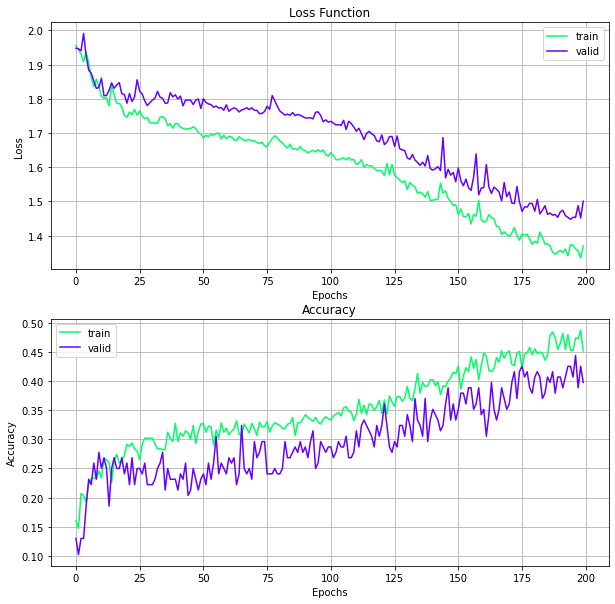

In [19]:
history_plot(history)

In [20]:
cnn_model.load_weights(fw)
cnn_model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 30ms/step - loss: 1.5541 - accuracy: 0.2963


[1.5541311502456665, 0.29629629850387573]